In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df['Outcome'].head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.shape

(768, 9)

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:>

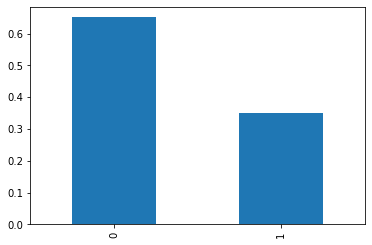

In [9]:
df['Outcome'].value_counts(normalize=True).plot.bar()

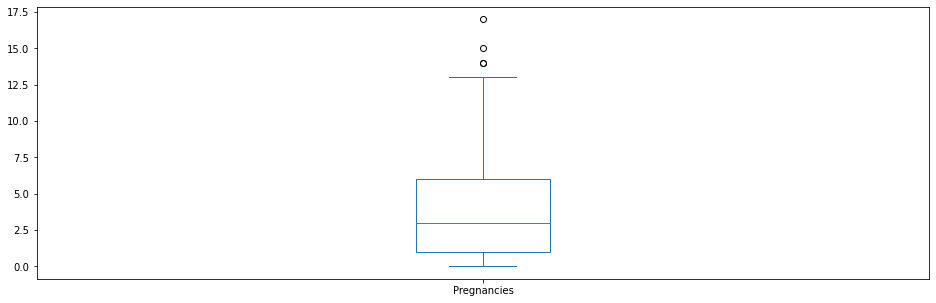

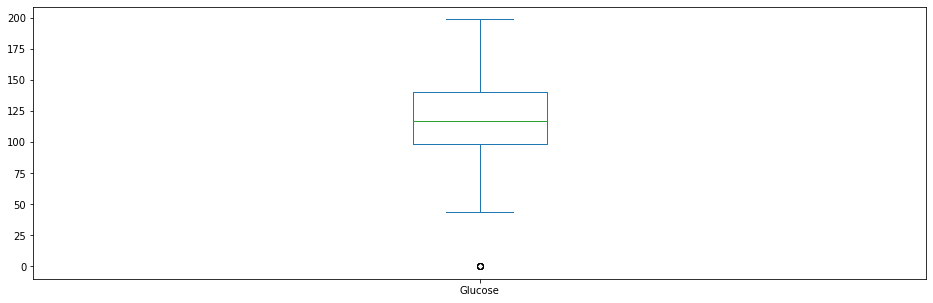

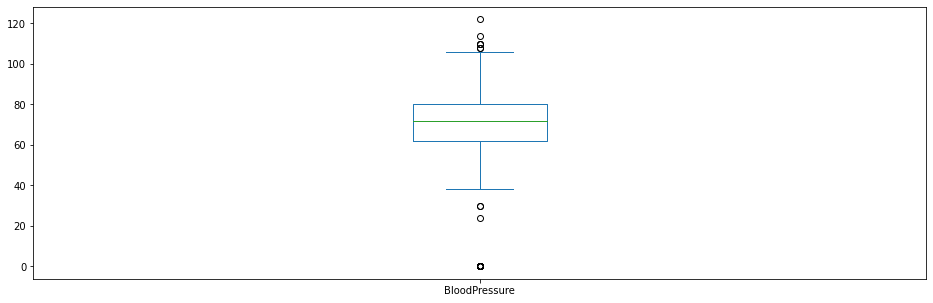

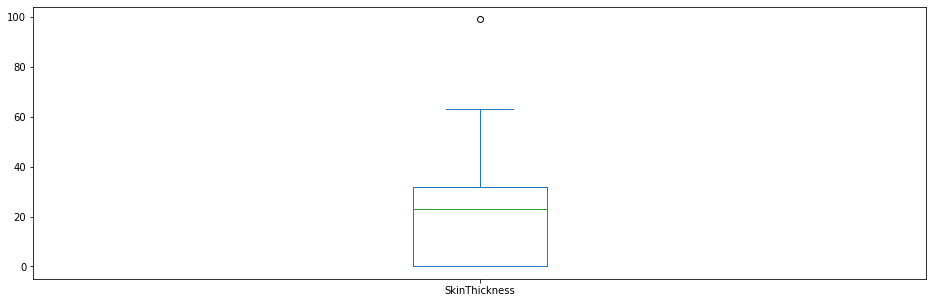

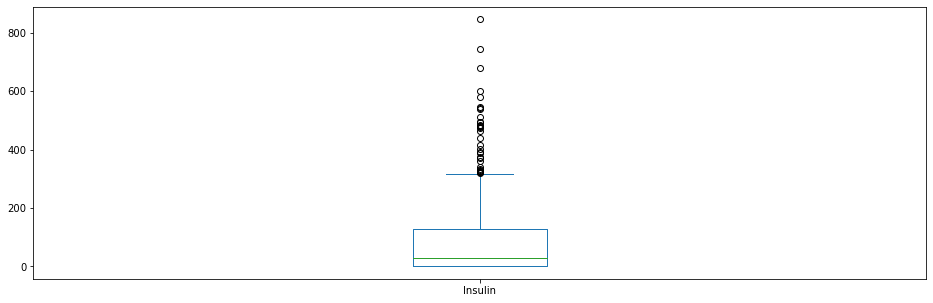

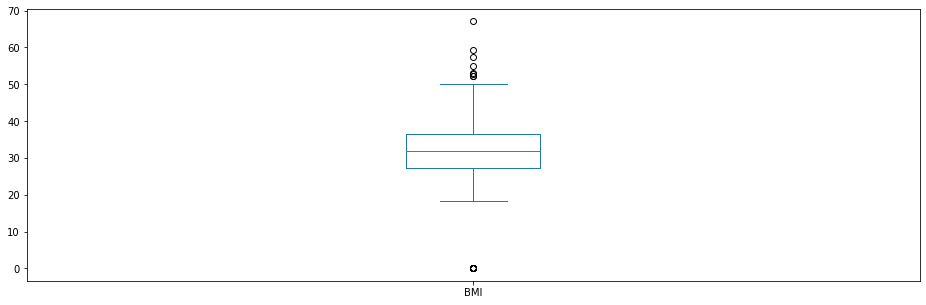

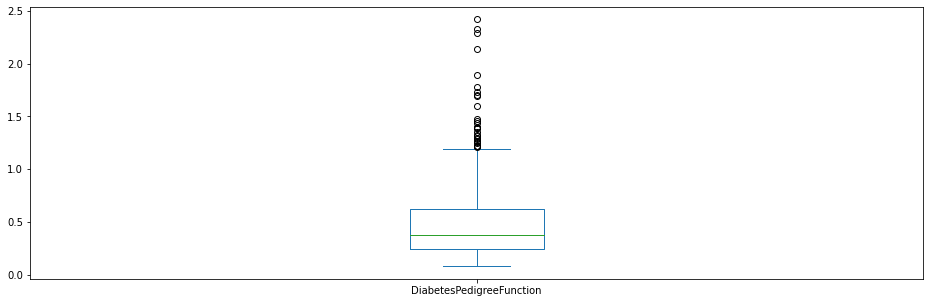

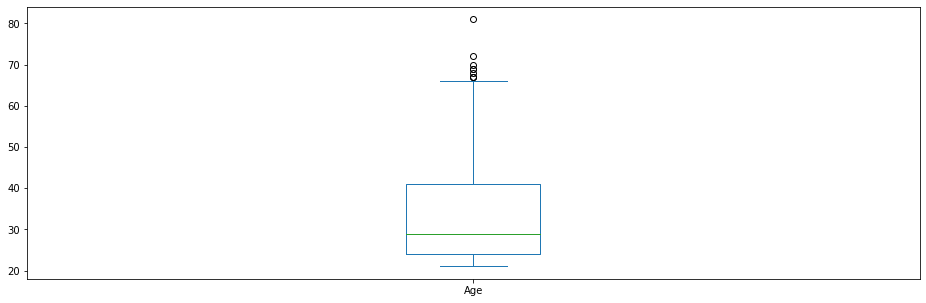

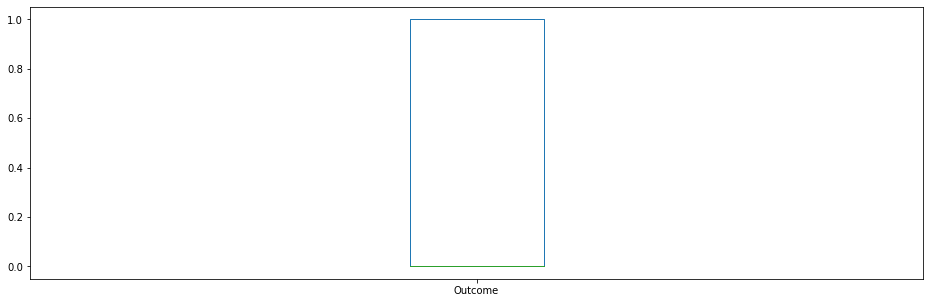

In [10]:
for col in df.columns: 
    df[col].plot.box(figsize=(16,5))
    plt.show()

In [11]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [12]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [13]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)
model = RandomForestClassifier()
model.fit(X_train,y_train)
predict_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)
predict_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


accuracy_score on train dataset :  1.0

accuracy_score on test dataset :  0.7922077922077922


In [15]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)
param_grid = {
'criterion': ['gini', 'entropy'],
'n_estimators': [100, 150, 200],
'max_depth': [None, 1, 3, 5, 10],
'min_samples_split': [10, 20],
'min_samples_leaf': [10, 20]
}
gs_rf = GridSearchCV(RandomForestClassifier(), param_grid = param_grid)
gs_rf.fit(X_train, y_train)
y_pred = gs_rf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_pred)
print('\naccuracy_score on test dataset : ', accuracy_test)


accuracy_score on test dataset :  0.7857142857142857


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
rfc = RandomForestClassifier()
forest_params = [{'max_depth': [1,3,5,10], 'n_estimators': list(range(20,40,2))}]
clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 3, 'n_estimators': 30}
0.7726764500349406


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)
clf = RandomForestClassifier(n_estimators=30, max_depth=5, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
print(accuracy_test)

0.8116883116883117


In [18]:
from sklearn import tree
for i in range(len(clf.estimators_)):
    print(tree.export_text(clf.estimators_[i]))

|--- feature_4 <= 109.00
|   |--- feature_7 <= 29.50
|   |   |--- feature_0 <= 6.50
|   |   |   |--- feature_5 <= 45.10
|   |   |   |   |--- feature_1 <= 130.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_1 >  130.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- feature_5 >  45.10
|   |   |   |   |--- class: 1.0
|   |   |--- feature_0 >  6.50
|   |   |   |--- feature_5 <= 32.15
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_5 >  32.15
|   |   |   |   |--- class: 0.0
|   |--- feature_7 >  29.50
|   |   |--- feature_6 <= 0.54
|   |   |   |--- feature_5 <= 29.65
|   |   |   |   |--- feature_1 <= 174.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_1 >  174.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- feature_5 >  29.65
|   |   |   |   |--- feature_1 <= 144.00
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_1 >  144.00
|   |   |   |   |   |--- class: 1.0
|   |   |--- feature_6 >  0.54
|   |   |   |--- feat

In [38]:
lll=[]
lll1=[]
from sklearn import tree
for i in range(len(clf.estimators_)):
    lll.append(tree.export_text(clf.estimators_[i]))
for i in range(len(lll)):
    lll1 = lll1 + lll[i].split("\n")
lll1 = [i for i in lll1 if i!= "" ]
lll1

['|--- feature_4 <= 109.00',
 '|   |--- feature_7 <= 29.50',
 '|   |   |--- feature_0 <= 6.50',
 '|   |   |   |--- feature_5 <= 45.10',
 '|   |   |   |   |--- feature_1 <= 130.50',
 '|   |   |   |   |   |--- class: 0.0',
 '|   |   |   |   |--- feature_1 >  130.50',
 '|   |   |   |   |   |--- class: 1.0',
 '|   |   |   |--- feature_5 >  45.10',
 '|   |   |   |   |--- class: 1.0',
 '|   |   |--- feature_0 >  6.50',
 '|   |   |   |--- feature_5 <= 32.15',
 '|   |   |   |   |--- class: 1.0',
 '|   |   |   |--- feature_5 >  32.15',
 '|   |   |   |   |--- class: 0.0',
 '|   |--- feature_7 >  29.50',
 '|   |   |--- feature_6 <= 0.54',
 '|   |   |   |--- feature_5 <= 29.65',
 '|   |   |   |   |--- feature_1 <= 174.50',
 '|   |   |   |   |   |--- class: 0.0',
 '|   |   |   |   |--- feature_1 >  174.50',
 '|   |   |   |   |   |--- class: 1.0',
 '|   |   |   |--- feature_5 >  29.65',
 '|   |   |   |   |--- feature_1 <= 144.00',
 '|   |   |   |   |   |--- class: 0.0',
 '|   |   |   |   |--- featur

In [41]:
lll1[-2]
len(lll1)

2106

In [19]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31


In [20]:
y_test.head()

661    1
122    0
113    0
14     1
529    0
Name: Outcome, dtype: int64

In [21]:
L = [i for i in X_test.index]
L

[661,
 122,
 113,
 14,
 529,
 103,
 338,
 588,
 395,
 204,
 31,
 546,
 278,
 593,
 737,
 202,
 175,
 55,
 479,
 365,
 417,
 577,
 172,
 352,
 27,
 605,
 239,
 744,
 79,
 496,
 285,
 422,
 640,
 374,
 385,
 404,
 648,
 500,
 575,
 40,
 181,
 354,
 563,
 399,
 8,
 145,
 271,
 419,
 198,
 683,
 578,
 142,
 215,
 756,
 452,
 75,
 1,
 303,
 451,
 706,
 662,
 364,
 626,
 266,
 317,
 408,
 355,
 272,
 250,
 403,
 624,
 222,
 253,
 622,
 235,
 351,
 672,
 499,
 720,
 556,
 583,
 150,
 85,
 526,
 735,
 350,
 242,
 18,
 236,
 623,
 602,
 251,
 313,
 50,
 548,
 572,
 638,
 608,
 39,
 406,
 162,
 156,
 10,
 68,
 267,
 443,
 736,
 471,
 316,
 2,
 760,
 214,
 586,
 187,
 415,
 283,
 279,
 258,
 249,
 740,
 725,
 362,
 318,
 582,
 413,
 694,
 698,
 386,
 456,
 728,
 71,
 49,
 210,
 409,
 503,
 37,
 687,
 48,
 261,
 653,
 331,
 568,
 196,
 76,
 64,
 671,
 52,
 310,
 416,
 476,
 482,
 230,
 527,
 380]

In [22]:
X_test1 = X_test.copy()
X_test1['Outcome'] = y_test
X_test1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
661,1,199,76,43,0,42.9,1.394,22,1
122,2,107,74,30,100,33.6,0.404,23,0
113,4,76,62,0,0,34.0,0.391,25,0
14,5,166,72,19,175,25.8,0.587,51,1
529,0,111,65,0,0,24.6,0.660,31,0


In [23]:
X_test1.to_csv('test_diabets.csv')

In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
df7 = df[(df['BloodPressure']<=81) & (df['Age']>28.5) & (df['BMI']>26.35) & (df['DiabetesPedigreeFunction']>0.14) & (df['Glucose']>103.0)]
df7

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
4,0,137,40,35,168,43.1,2.288,33,1
8,2,197,70,45,543,30.5,0.158,53,1
11,10,168,74,0,0,38.0,0.537,34,1
12,10,139,80,0,0,27.1,1.441,57,0
...,...,...,...,...,...,...,...,...,...
748,3,187,70,22,200,36.4,0.408,36,1
754,8,154,78,32,0,32.4,0.443,45,1
757,0,123,72,0,0,36.3,0.258,52,1
761,9,170,74,31,0,44.0,0.403,43,1
